In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/wine-clustering.csv")

In [3]:
df.shape

(178, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df = df.head(100)
df = df.drop(columns=['Ash','Ash_Alcanity','Magnesium','Flavanoids','Proanthocyanins','Hue','OD280','Proline'])
df.head()

,Alcohol,Malic_Acid,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity
0,14.23,1.71,2.80,0.28,5.64
1,13.20,1.78,2.65,0.26,4.38
2,13.16,2.36,2.80,0.30,5.68
3,14.37,1.95,3.85,0.24,7.80
4,13.24,2.59,2.80,0.39,4.32


In [6]:
df.shape

(100, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               100 non-null    float64
 1   Malic_Acid            100 non-null    float64
 2   Total_Phenols         100 non-null    float64
 3   Nonflavanoid_Phenols  100 non-null    float64
 4   Color_Intensity       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Total_Phenols           0
Nonflavanoid_Phenols    0
Color_Intensity         0
dtype: int64

Text(0, 0.5, 'Color_Intensity')

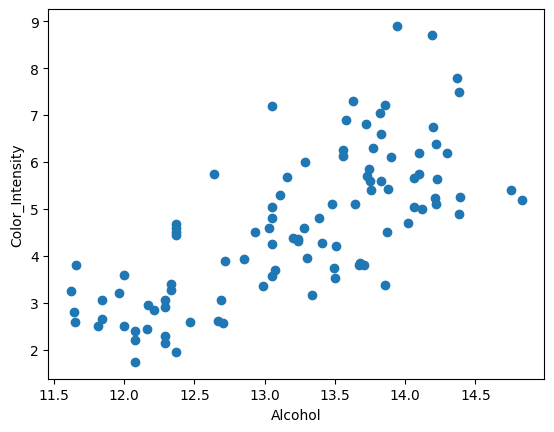

In [9]:
plt.scatter(df.Alcohol,df['Color_Intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')

**Kmeans Clustering (Model 1)**

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Alcohol','Color_Intensity']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

In [11]:
df['cluster']=y_predicted
df.head(100)

,Alcohol,Malic_Acid,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,cluster
0,14.23,1.71,2.80,0.28,5.64,1
1,13.20,1.78,2.65,0.26,4.38,0
2,13.16,2.36,2.80,0.30,5.68,1
3,14.37,1.95,3.85,0.24,7.80,1
4,13.24,2.59,2.80,0.39,4.32,0
...,...,...,...,...,...,...
95,12.47,1.52,2.50,0.32,2.60,2
96,11.81,2.12,1.60,0.14,2.50,2
97,12.29,1.41,2.55,0.29,2.90,2
98,12.37,1.07,3.52,0.24,4.50,0


In [12]:
df['cluster'].value_counts()

0    37
1    35
2    28
Name: cluster, dtype: int64

In [13]:
km.cluster_centers_

array([[13.32432432,  4.3627027 ],
       [13.89514286,  6.32628571],
       [12.16107143,  2.77714286]])

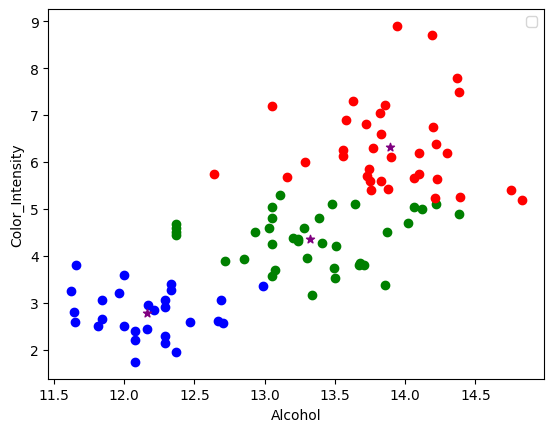

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Alcohol,df1['Color_Intensity'],color='green')
plt.scatter(df2.Alcohol,df2['Color_Intensity'],color='red')
plt.scatter(df3.Alcohol,df3['Color_Intensity'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.legend()

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['Color_Intensity']])
df['Color_Intensity'] = scaler.transform(df[['Color_Intensity']])

scaler.fit(df[['Alcohol']])
df['Alcohol'] = scaler.transform(df[['Alcohol']])

df.head()

,Alcohol,Malic_Acid,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,cluster
0,0.813084,1.71,2.80,0.28,0.544693,1
1,0.492212,1.78,2.65,0.26,0.368715,0
2,0.479751,2.36,2.80,0.30,0.550279,1
3,0.856698,1.95,3.85,0.24,0.846369,1
4,0.504673,2.59,2.80,0.39,0.360335,0


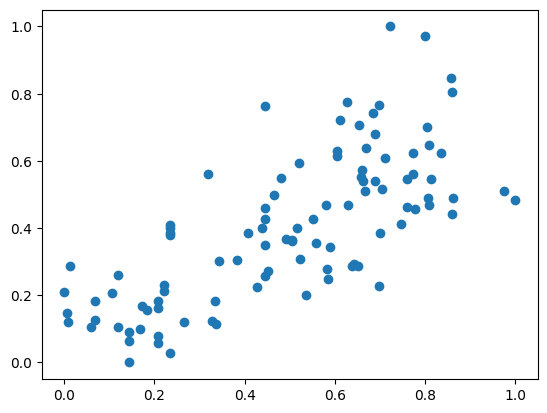

In [16]:
plt.scatter(df.Alcohol,df['Color_Intensity'])

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Alcohol','Color_Intensity']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,Alcohol,Malic_Acid,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,cluster
0,0.813084,1.71,2.80,0.28,0.544693,2
1,0.492212,1.78,2.65,0.26,0.368715,1
2,0.479751,2.36,2.80,0.30,0.550279,1
3,0.856698,1.95,3.85,0.24,0.846369,2
4,0.504673,2.59,2.80,0.39,0.360335,1


In [19]:
km.cluster_centers_

array([[0.16862627, 0.17435574],
       [0.51542559, 0.35718147],
       [0.73594032, 0.61974419]])

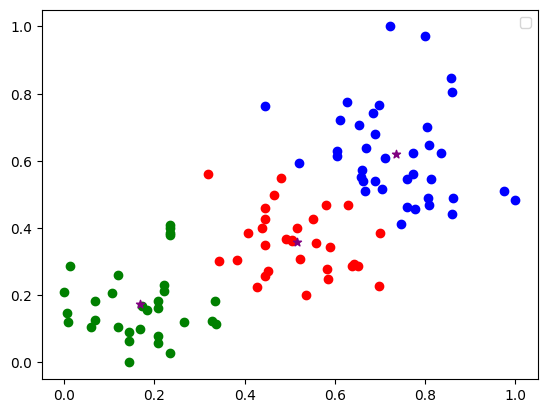

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Alcohol,df1['Color_Intensity'],color='green')
plt.scatter(df2.Alcohol,df2['Color_Intensity'],color='red')
plt.scatter(df3.Alcohol,df3['Color_Intensity'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

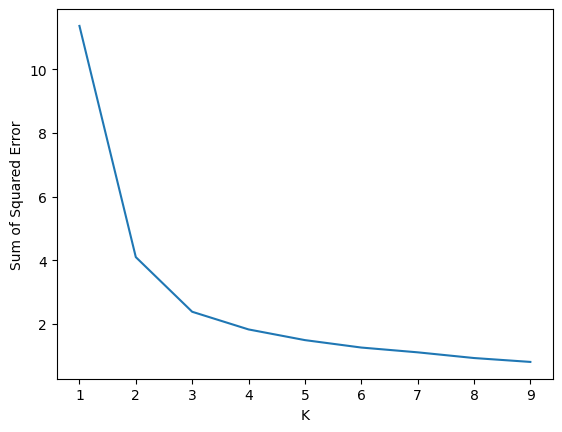

In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Alcohol','Color_Intensity']])
  sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

**Hierarchical Clustering (Model 2)**

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 3)

y_hc = hc.fit_predict(df[['Alcohol','Color_Intensity']])

In [24]:
df['y_hc']=y_hc

In [25]:
df['y_hc'].value_counts()

0    40
1    33
2    27
Name: y_hc, dtype: int64

**Gaussian Mixture Model (GMM) (Model 3)**

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gmm = GaussianMixture(n_components=3, n_init=5, random_state=42)

In [28]:
y_gmm = gmm.fit_predict(df[['Alcohol','Color_Intensity']])

In [29]:
df['y_gmm']=y_gmm

In [30]:
df['y_gmm'].value_counts()

0    42
2    31
1    27
Name: y_gmm, dtype: int64

**Density-based spatial clustering of applications
with noise (DBSCAN) (Model 4)**

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=0.8, min_samples=5)

In [33]:
y_dbscan = dbscan.fit_predict(df[['Alcohol','Color_Intensity']])

In [34]:
df['y_dbscan'] = y_dbscan

In [35]:
df['y_dbscan'].value_counts()

0    100
Name: y_dbscan, dtype: int64

Dimensionality reduction

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
pca=PCA(n_components=2).fit_transform(df[['Alcohol','Color_Intensity']])

df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

tsne=TSNE(n_components=2).fit_transform(df[['Alcohol','Color_Intensity']])
df['TSNE1'] = tsne[:, 0]
df['TSNE2'] = tsne[:, 1]

df.head()

,Alcohol,Malic_Acid,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,cluster,y_hc,y_gmm,y_dbscan,PCA1,PCA2,TSNE1,TSNE2
0,0.813084,1.71,2.80,0.28,0.544693,2,0,0,0,0.340627,-0.090043,7.345363,-2.707095
1,0.492212,1.78,2.65,0.26,0.368715,1,1,2,0,-0.019479,-0.024842,2.273572,1.113281
2,0.479751,2.36,2.80,0.30,0.550279,1,1,0,0,0.085112,0.124093,2.531266,-1.426759
3,0.856698,1.95,3.85,0.24,0.846369,2,0,0,0,0.564389,0.116937,6.704740,-5.590847
4,0.504673,2.59,2.80,0.39,0.360335,1,1,2,0,-0.015070,-0.039197,2.510680,1.275895


In [39]:
target = df['Alcohol']
df['y_predicted'] = y_predicted

[Text(0.5, 1.0, 'DBSCAN')]

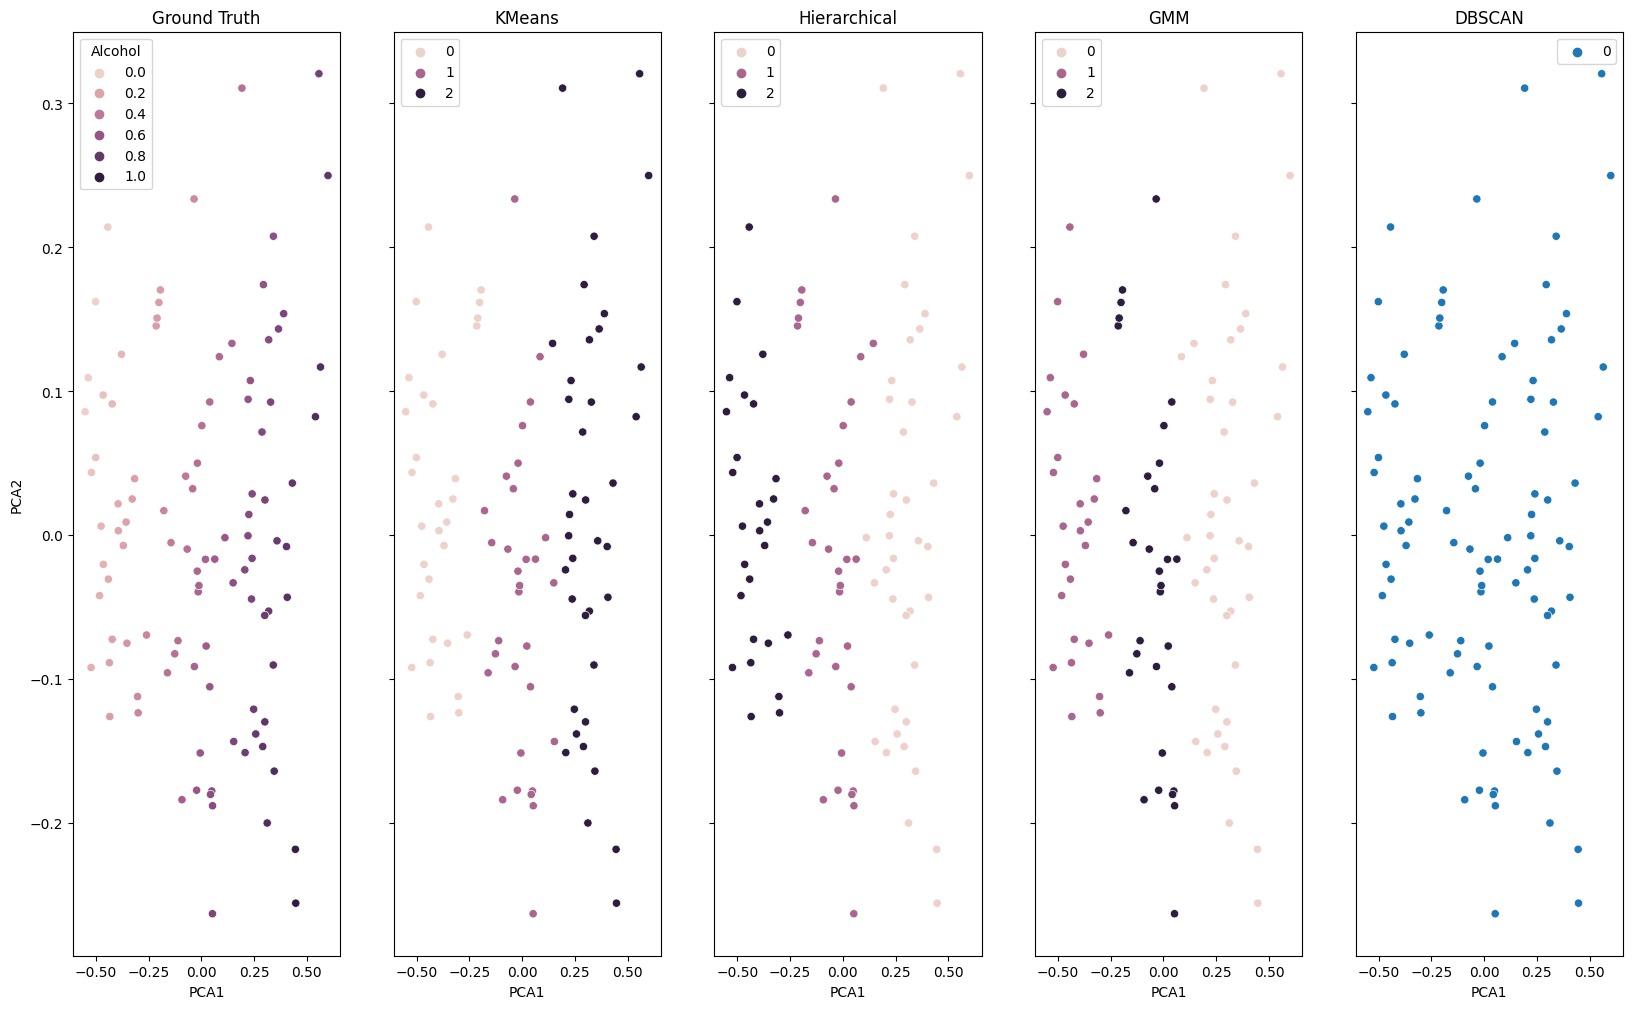

In [40]:
df.groupby([target, y_predicted]).size().reset_index(name='counts')

df['y_predicted'] = df['y_predicted'].map({1: 0, 0: 1, 2: 2})

df.groupby([target,'y_hc']).size().reset_index(name='counts')

df['y_hc'] = df['y_hc'].map({1: 0, 0: 1, 2: 2})

df.groupby([target, 'y_gmm']).size().reset_index(name='counts')

df['y_gmm'] = df['y_gmm'].map({1: 0, 0: 1, 2: 2})

df.groupby([target,'y_dbscan']).size().reset_index(name='counts')

df['y_dbscan'] = df['y_dbscan'].map({0: 0, -1: 2, 1: 1})

fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=target, ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=y_predicted, ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=y_hc, ax=axs[2]).set(title='Hierarchical')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=y_gmm, ax=axs[3]).set(title='GMM')
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=y_dbscan, ax=axs[4]).set(title='DBSCAN')


[Text(0.5, 1.0, 'DBSCAN')]

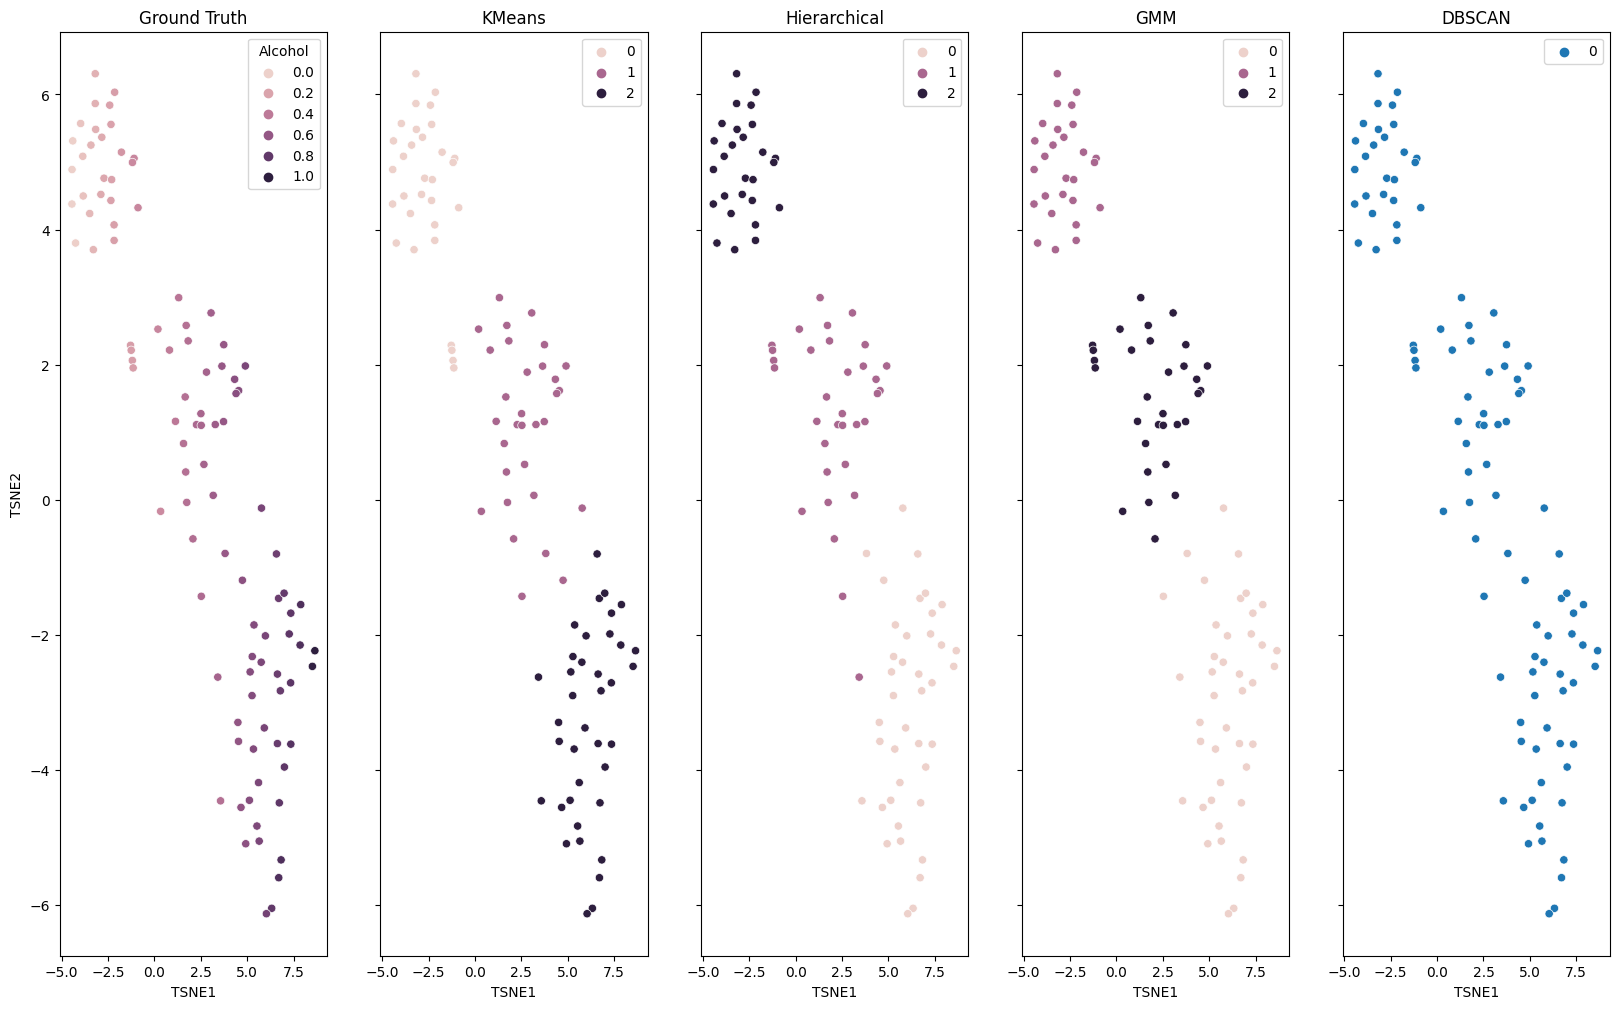

In [41]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(20,12))

sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue=target, ax=axs[0]).set(title='Ground Truth')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue=y_predicted, ax=axs[1]).set(title='KMeans')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue=y_hc, ax=axs[2]).set(title='Hierarchical')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue=y_gmm, ax=axs[3]).set(title='GMM')
sns.scatterplot(x='TSNE1', y='TSNE2', data=df, hue=y_dbscan, ax=axs[4]).set(title='DBSCAN')


In [43]:
# # Feature list
# varList = ['Malic_Acid', 'Color_Intensity', 'Total_Phenols', 'Nonflavanoid_Phenols']
# avg = pd.DataFrame(df.groupby([y_gmm, target])[varList].mean().reset_index())

# # Calculate average values by predicted cluster
# avg = pd.DataFrame(df.groupby([y_gmm, target])[varList].mean().reset_index())

# # Visualize the average values by cluster for each feature
# fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,12))

# sns.barplot(x=y_gmm, y=varList[0], data=avg, ax=axs[0,0]).set(xlabel='Cluster Label', ylabel=varList[0], title='Average ' + varList[0] + ' by Cluster')
# sns.barplot(x=y_gmm, y=varList[1], data=avg, ax=axs[0,1]).set(xlabel='Cluster Label', ylabel=varList[1], title='Average ' + varList[1] + ' by Cluster')
# sns.barplot(x=y_gmm, y=varList[2], data=avg, ax=axs[1,0]).set(xlabel='Cluster Label', ylabel=varList[2], title='Average ' + varList[2] + ' by Cluster')
# sns.barplot(x=y_gmm, y=varList[3], data=avg, ax=axs[1,1]).set(xlabel='Cluster Label', ylabel=varList[3], title='Average ' + varList[3] + ' by Cluster')

# plt.tight_layout()
# plt.show()
